# CNN

A convolution is the process of applying a filter (“kernel”) to an image. Max pooling is the process of reducing the size of the image through downsampling.

As you will see in the following Colab notebook, convolutional layers can be added to the neural network model using the Conv2D layer type in Keras. This layer is similar to the Dense layer, and has weights and biases that need to be tuned to the right values. The Conv2D layer also has kernels (filters) whose values need to be tuned as well. So, in a Conv2D layer the values inside the filter matrix are the variables that get tuned in order to produce the right output.

Here are some of terms that were introduced in this lesson:

* CNNs: Convolutional neural network. That is, a network which has at least one convolutional layer. A typical CNN also includes other types of layers, such as pooling layers and dense layers.
* Convolution: The process of applying a kernel (filter) to an image
* Kernel / filter: A matrix which is smaller than the input, used to transform the input into chunks
* Padding: Adding pixels of some value, usually 0, around the input image
* Pooling The process of reducing the size of an image through downsampling.There are several types of pooling layers. For example, average pooling converts many values into a single value by taking the average. However, maxpooling is the most common.
* Maxpooling: A pooling process in which many values are converted into a single value by taking the maximum value from among them.
* Stride: the number of pixels to slide the kernel (filter) across the image.
* Downsampling: The act of reducing the size of an image


## Example 1

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np

/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kche2/miniconda3/envs/dl-keras

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

#### Build a layer
We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

* input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

* units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

#### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

* **Optimizer:** A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)
* **Learning rate:** The “step size” for loss improvement during gradient descent.  If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1
* **Batch:** The set of examples used during training of the neural network
* **Epoch:** A full pass over the entire training dataset
* **Forward pass:** The computation of output values from input
* **Backward pass (backpropagation):** The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
model.predict([100.0])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


array([[211.33841]], dtype=float32)

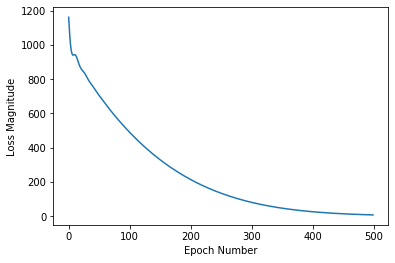

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [6]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8253686]], dtype=float32), array([28.765251], dtype=float32)]


In [7]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74745]]
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[-0.17565991, -0.20773004,  0.18017174,  0.4967873 ]],
      dtype=float32), array([-3.2492092, -3.4357972,  3.3354301,  3.1664417], dtype=float32)]
These are the l1 variables: [array([[-0.06859038, -0.55766064,  0.05988989,  0.96457636],
       [-0.31583828,  0.30095786,  0.5241918 ,  1.2677679 ],
       [-0.01533956,  0.40499732,  0.48438108, -1.2553083 ],
       [-0.36358732,  0.18578881,  0.19512482, -1.0798627 ]],
      dtype=float32), array([-2.0123954,  2.6298482,  1.1748564, -3.2874684], dtype=float32)]
These are the l2 variables: [array([[-0.01537702],
       [ 0.49741876],
       [-0.02542707],
       [-1.4205296 ]], dtype=float32), array([3.1849024], dtype=float32)]


## Example 2: classify images of clothing

In [9]:
!pip install -U tensorflow_datasets

Looking in indexes: https://artifactory.allstate.com/artifactory/api/pypi/pypi/simple
     |████████████████████████████████| 2.3MB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 829kB 1.5MB/s eta 0:00:01
  Using cached https://artifactory.allstate.com/artifactory/api/pypi/pypi/packages/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
     |████████████████████████████████| 440kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 61kB 19.7MB/s eta 0:00:01
     |████████████████████████████████| 153kB 1.6MB/s eta 0:00:01
  Using cached https://artifactory.allstate.com/artifactory/api/pypi/pypi/packages/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
     |████████████████████████████████| 133kB 842kB/s eta 0:00:01
  Using cached https://artifactory.allstate.com/artifactory/api/pypi/pypi/packages/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
#tf.enable_eager_execution()

/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kche2/miniconda3/envs/dl-keras

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.14.0


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)



####  Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset, which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 $\times$ 28 pixels). 


Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, using the Datasets API:

In [ ]:
# API is blocked by VPN
# dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
# train_dataset, test_dataset = dataset['train'], dataset['test']

# num_train_examples = metadata.splits['train'].num_examples
# num_test_examples = metadata.splits['test'].num_examples
# print("Number of training examples: {}".format(num_train_examples))
# print("Number of test examples:     {}".format(num_test_examples))

In [2]:
def load_mnist(path):
    import os
    import gzip
    import numpy as np
    
    def load_helper(kind):
        """Load MNIST data from `path`"""
        labels_path = os.path.join(path,
                                   '%s-labels-idx1-ubyte.gz'
                                   % kind)
        images_path = os.path.join(path,
                                   '%s-images-idx3-ubyte.gz'
                                   % kind)

        with gzip.open(labels_path, 'rb') as lbpath:
            labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                                   offset=8)

        with gzip.open(images_path, 'rb') as imgpath:
            images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                                   offset=16).reshape(len(labels), 784)

        return images, labels
    
    X_train, y_train = load_helper(kind='train')
    X_test, y_test = load_helper(kind='t10k')
    return X_train, y_train, X_test, y_test
        
        



In [11]:
X_train, y_train, X_test, y_test = load_mnist('data/fashion_mnist')

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [13]:
num_train_examples = X_train.shape[0]
num_test_examples = X_test.shape[0]
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


### Preprocess the data
The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function, and then apply it to each image in the test and train datasets.



In [6]:
# def normalize(images, labels):
#     images = tf.cast(images, tf.float32)
#     images /= 255
#     return images, labels

# # The map function applies the normalize function to each element in the train
# # and test datasets
# train_dataset =  train_dataset.map(normalize)
# test_dataset  =  test_dataset.map(normalize)

# # Take a single image, and remove the color dimension by reshaping
# for image, label in test_dataset.take(1):
#     break
# image = image.numpy().reshape((28,28))

# # Plot the image - voila a piece of fashion clothing
# plt.figure()
# plt.imshow(image, cmap=plt.cm.binary)
# plt.colorbar()
# plt.grid(False)
# plt.show()

# plt.figure(figsize=(10,10))
# i = 0
# for (image, label) in test_dataset.take(25):
#     image = image.numpy().reshape((28,28))
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(image, cmap=plt.cm.binary)
#     plt.xlabel(class_names[label])
#     i += 1
# plt.show()

In [14]:
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])
print(X_train.shape)
X_train = X_train/255
X_test = X_test/255

(60000, 28, 28, 1)


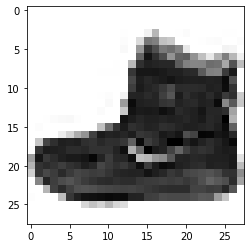

In [15]:
plt.imshow(1-X_train[0][:, :, 0], cmap='gray')

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

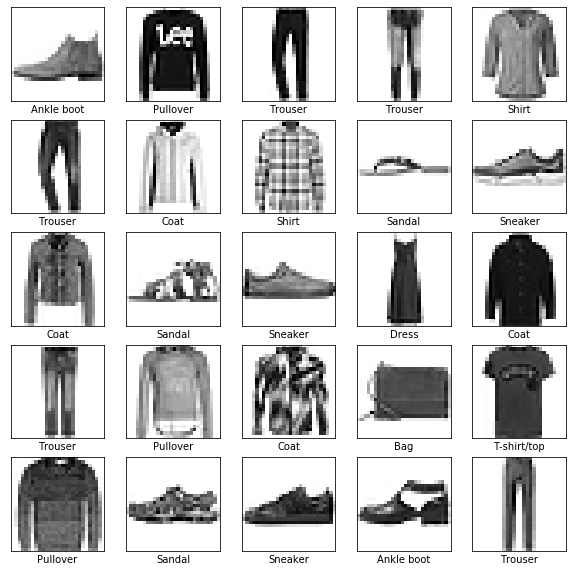

In [16]:
plt.figure(figsize=(10,10))
i = 0
for image in X_test[0:25]:
    #image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(1-image[:, :, 0], cmap='gray')
    plt.xlabel(class_names[y_test[i]])
    i += 1
plt.show()

### Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have internal parameters which are adjusted ("learned") during training.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

This network layers are:

* **"convolutions"** `tf.keras.layers.Conv2D and MaxPooling2D`— Network start with two pairs of Conv/MaxPool. The first layer is a Conv2D filters (3,3) being applied to the input image, retaining the original image size by using padding, and creating 32 output (convoluted) images (so this layer creates 32 convoluted images of the same size as input). After that, the 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2. The next Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs which are again reduced in size by a MaxPooling2D layer. So far in the course, we have described what a Convolution does, but we haven't yet covered how you chain multiples of these together. We will get back to this in lesson 4 when we use color images. At this point, it's enough if you understand the kind of operation a convolutional filter performs

* **output** `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [ ]:
# BATCH_SIZE = 32
# train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

# model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

### Another model

In [17]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_train)

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding="same"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.10, batch_size=64, epochs=25, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25


## Evaluate accuracy

Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [ ]:
#test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

test_loss, test_accuracy = model.evaluate(X_test, y_test, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

# Dogs vs Cats Image Classification Without Image Augmentation

## Specific concepts that will be covered:
In the process, we will build practical experience and develop intuition around the following concepts

* Building _data input pipelines_ using the `tf.keras.preprocessing.image.ImageDataGenerator` class — How can we efficiently work with data on disk to interface with our model?
* _Overfitting_ - what is it, how to identify it?


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
    # Use the %tensorflow_version magic if in colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kche2/miniconda3/envs/dl-keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kche2/miniconda3/envs/dl-keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
from IPython.display import display
from PIL import Image
import PIL

### Data Loading

To build our image classifier, we begin by downloading the dataset. The dataset we are using is a filtered version of Dogs vs. Cats dataset from Kaggle (ultimately, this dataset is provided by Microsoft Research).

In previous Colabs, we've used TensorFlow Datasets, which is a very easy and convenient way to use datasets. In this Colab however, we will make use of the class tf.keras.preprocessing.image.ImageDataGenerator which will read data from disk. We therefore need to directly download Dogs vs. Cats from a URL and unzip it to the Colab filesystem.

In [6]:
#_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
#zip_dir_base = os.path.dirname(zip_dir)


In [22]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures


data/cats_and_dogs_filtered/train
2000


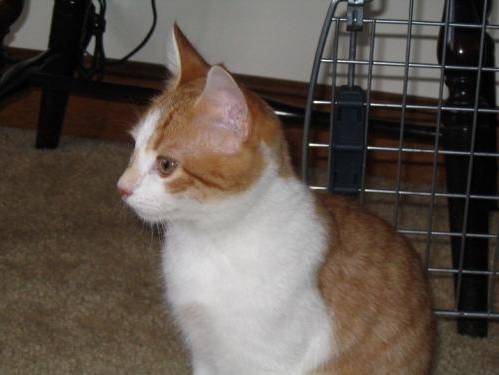

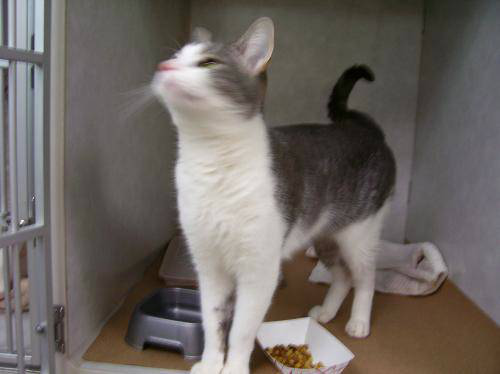

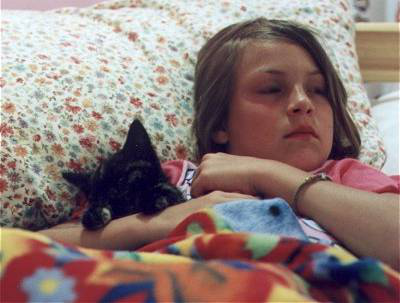

In [44]:
import pathlib
import IPython.display as display
data_dir = pathlib.Path(train_dir)
print(data_dir)
print(len(list(data_dir.glob('*/*.jpg'))))
train_cats = list(data_dir.glob('cats/*'))

for image_path in train_cats[:3]:
    display.display(Image.open(str(image_path)))

In [23]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [24]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### Setting Model Parameters

In [20]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

### Data Preparation 
Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network. The steps involved in preparing these images are:

1. Read images from the disk
2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done using the class **tf.keras.preprocessing.image.ImageDataGenerator**.

We can set this up in a couple of lines of code.

In [12]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

After defining our generators for training and validation images, **flow_from_directory** method will load images from the disk, apply rescaling, and resize them using single line of code.

In [13]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


### Visualizing training images
We can visualize our training images by getting a batch of images from the training generator, and then plotting a few of them using `matplotlib`.

In [15]:
sample_training_images, _ = next(train_data_gen) 

The `next` function returns a batch from the dataset. One batch is a tuple of (*many images*, *many labels*). For right now, we're discarding the labels because we just want to look at the images.

In [16]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

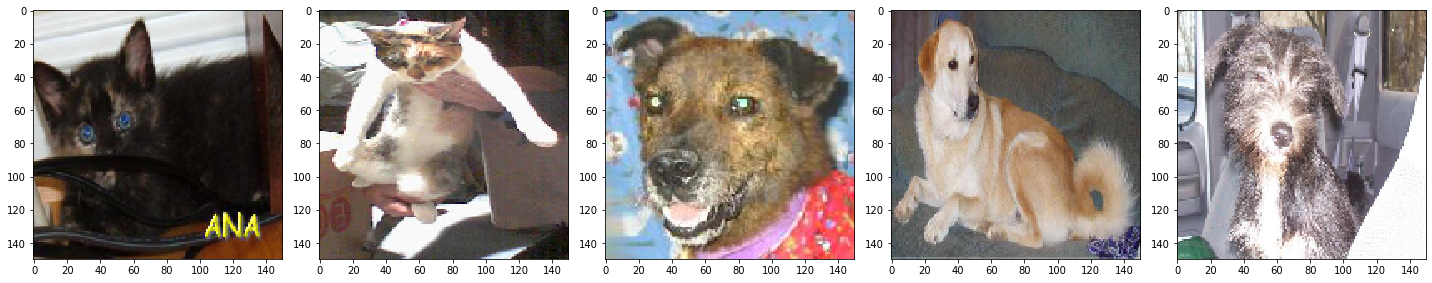

In [17]:
plotImages(sample_training_images[:5]) 

In [74]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.title(CLASS_NAMES[int(label_batch[n]==0)].title())
        plt.axis('off')

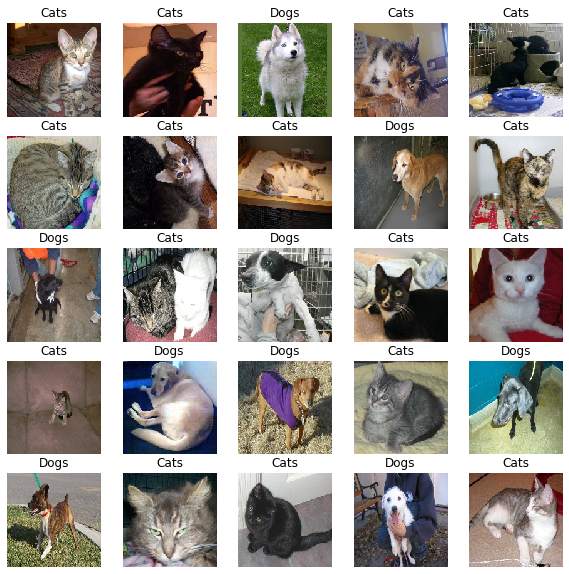

In [75]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

## Model Creation

### Define the model

The model consists of four convolution blocks with a max pool layer in each of them. Then we have a fully connected layer with 512 units, with a `relu` activation function. The model will output class probabilities for two classes — dogs and cats — using `softmax`. 

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

### Compile the model

As usual, we will use the `adam` optimizer. Since we output a softmax categorization, we'll use `sparse_categorical_crossentropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Train the model
It's time we train our network.

Since our batches are coming from a generator (`ImageDataGenerator`), we'll use `fit_generator` instead of `fit`.

In [ ]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

"""
Epoch 1/100
20/20 [==============================] - 31s 2s/step - loss: 0.7097 - acc: 0.4825 - val_loss: 0.6914 - val_acc: 0.5810
Epoch 2/100
20/20 [==============================] - 43s 2s/step - loss: 0.6918 - acc: 0.5205 - val_loss: 0.6868 - val_acc: 0.5070
Epoch 3/100
20/20 [==============================] - 48s 2s/step - loss: 0.6822 - acc: 0.5615 - val_loss: 0.6498 - val_acc: 0.6330
Epoch 4/100
20/20 [==============================] - 47s 2s/step - loss: 0.6602 - acc: 0.5980 - val_loss: 0.6518 - val_acc: 0.6540
Epoch 5/100
...

"""

We'll now visualize the results we get after training our network.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

As we can see from the plots, training accuracy and validation accuracy are off by large margin and our model has achieved only around **70%** accuracy on the validation set (depending on the number of epochs you trained for).

This is a clear indication of overfitting. Once the training and validation curves start to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.